#Tarea 5_ Proyecto Análisis de Datos
#Estudiante: Karol Jiseth Martínez Páez 

In [11]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1.Análisis Exploratorio de los Datos (EDA)

In [13]:
# Cargar el dataset Titanic
data = pd.read_csv('Titanic-Dataset.csv')

In [14]:
# Ver las primeras filas del dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Ver información general sobre el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# Resumen estadístico de las variables numéricas
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Comprobar valores nulos
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

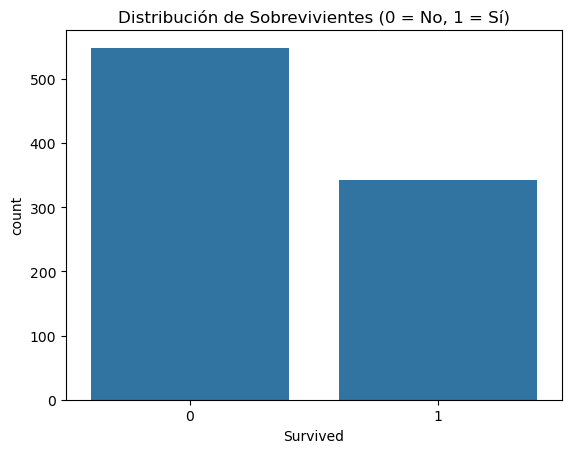

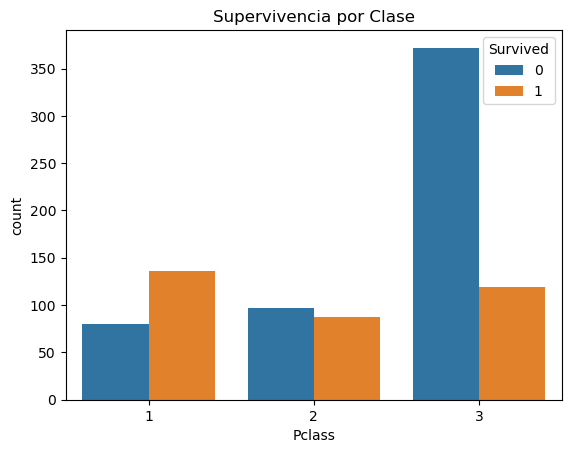

In [24]:
# Variables categóricas y distribución
sns.countplot(data=data, x='Survived')
plt.title('Distribución de Sobrevivientes (0 = No, 1 = Sí)')
plt.show()

sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Supervivencia por Clase')
plt.show()

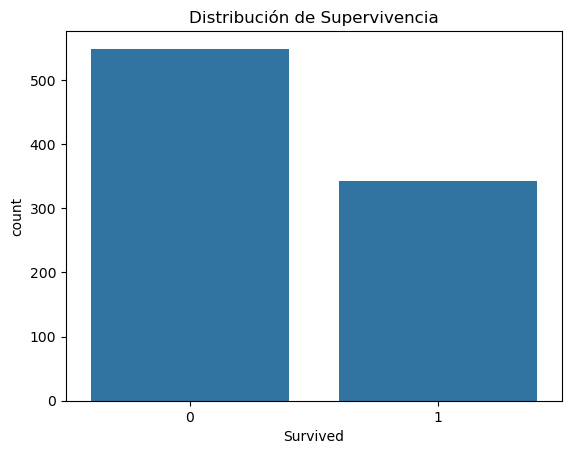

In [26]:
# Visualización de la distribución de la variable objetivo (Supervivencia)
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.show()



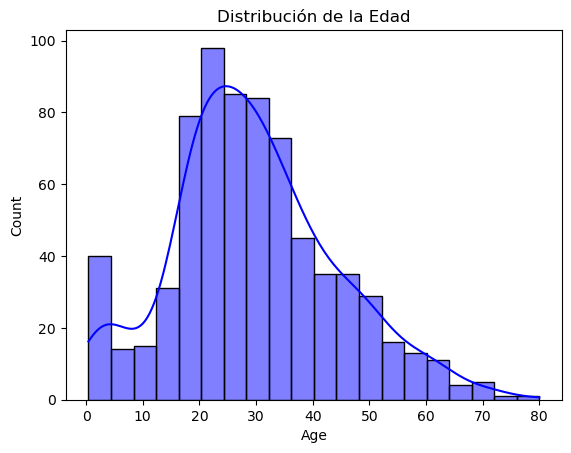

In [28]:
# Visualización de la distribución de la edad
sns.histplot(data['Age'].dropna(), kde=True, color='blue')
plt.title('Distribución de la Edad')
plt.show()



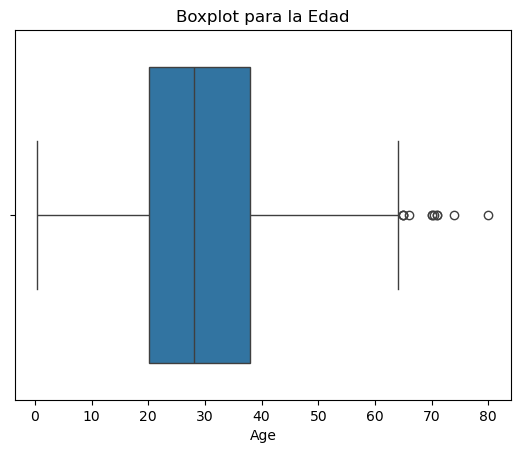

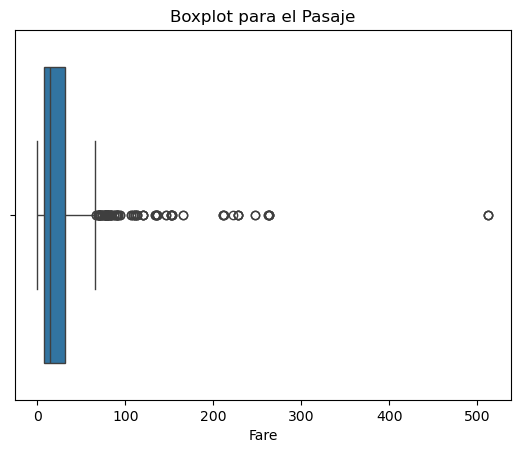

In [30]:
# Boxplot para la variable 'Age'
sns.boxplot(x=data['Age'])
plt.title('Boxplot para la Edad')
plt.show()

# Boxplot para la variable 'Fare'
sns.boxplot(x=data['Fare'])
plt.title('Boxplot para el Pasaje')
plt.show()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64


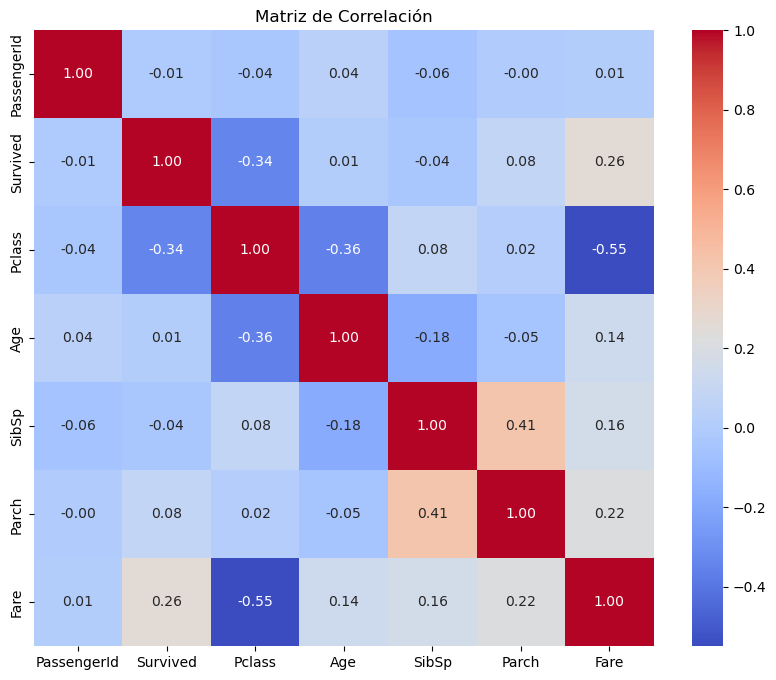

In [32]:
# Seleccionar únicamente columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Verificar valores faltantes en las columnas numéricas
print(numeric_data.isnull().sum())

# Llenar valores faltantes si es necesario
numeric_data.fillna(0, inplace=True)  # O usa otro método como mediana/media

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Paso 2: Preprocesar los datos 

In [43]:
# Identificación de valores faltantes
print(data.isnull().sum())  # Resumen de datos faltantes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [278]:
# Convertir 'Sex' a valores numéricos (1 para 'male', 2 para 'female')
data['Sex'] = data['Sex'].map({'male': 1, 'female': 2}).fillna(0)

In [282]:
# Convertir 'Embarked' a valores numéricos (C = 1, Q = 2, S = 3)
data['Embarked'] = data['Embarked'].map({'C': 1, 'Q': 2, 'S': 3}).fillna(0)

In [284]:
# Verificar los cambios
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_known
0,1,0,3,0.0,22.0,1,0,7.2500,0.0,0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0,1
2,3,1,3,0.0,26.0,0,0,7.9250,0.0,0
3,4,1,1,0.0,35.0,1,0,53.1000,0.0,1
4,5,0,3,0.0,35.0,0,0,8.0500,0.0,0


# 3. Selección de Características más relevantes 

In [171]:
# Crear las características y la variable objetivo
X = data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]
y = data['Survived']

In [197]:
# Importancia de características con Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

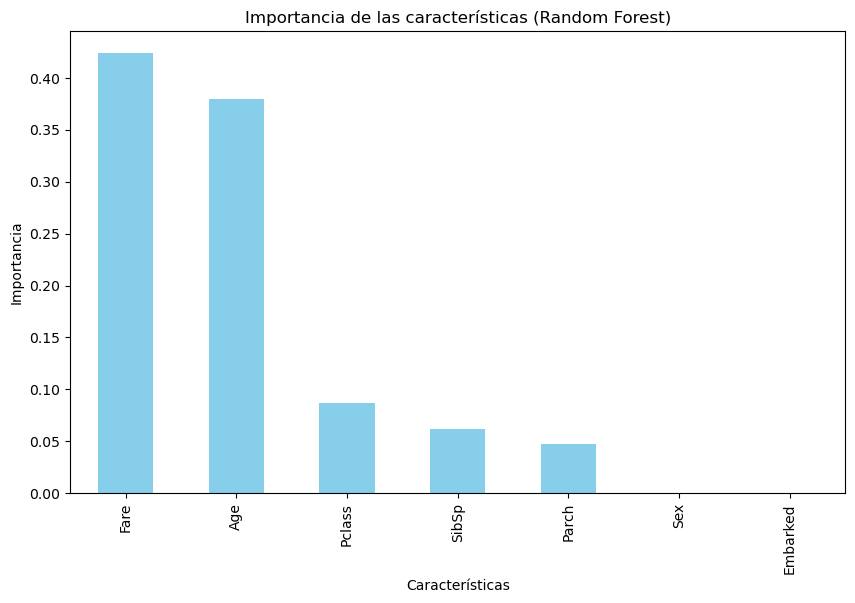

In [248]:
# Calcular la correlación
correlaciones = data.corr()['Survived']
print(correlaciones)

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex                 NaN
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked            NaN
Cabin_known    0.316912
Name: Survived, dtype: float64


# 4. División del dataset en Train y Test 

In [174]:
# División en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (712, 7)
Tamaño del conjunto de prueba: (179, 7)


# 5.Entrenar el modelo configurando los diferentes hiperparámetros. 

In [177]:
# Suponiendo que X e y son tus variables de características y objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
# Definir el modelo
model = RandomForestClassifier()

In [181]:
# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestClassifier()

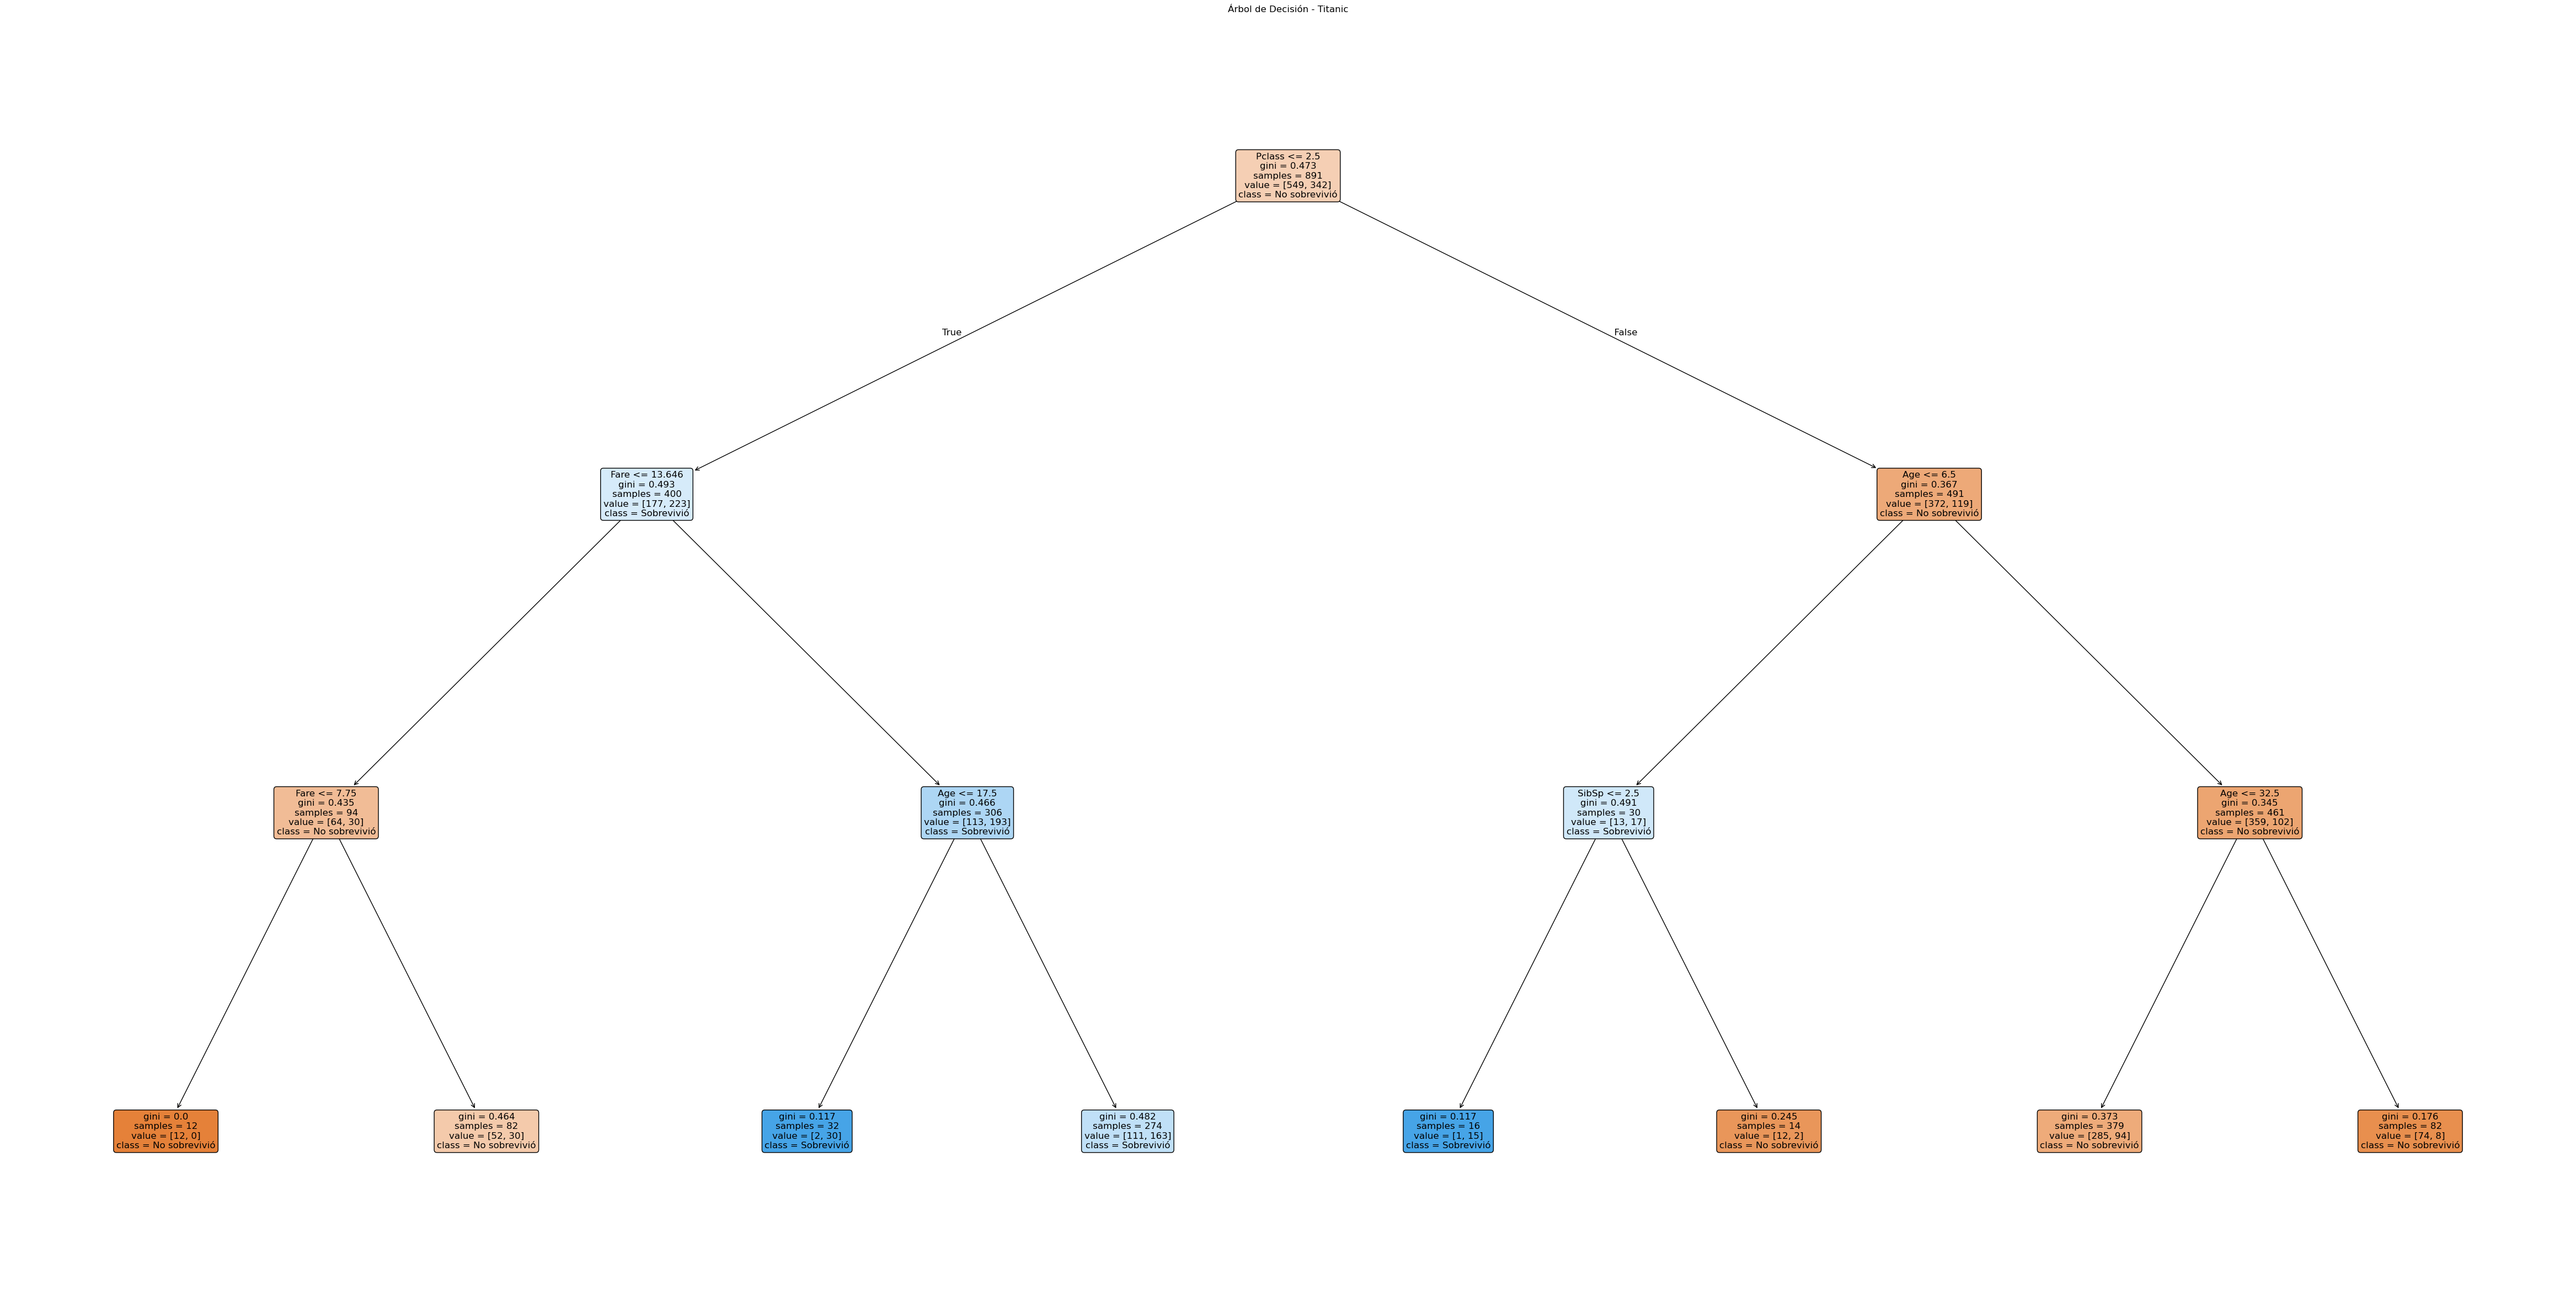

In [211]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrenar el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3)  # Puedes ajustar max_depth según sea necesario
tree_model.fit(X, y)

# Visualización del árbol de decisión
plt.figure(figsize=(60, 30))  # Ajusta el tamaño de la figura según lo necesario
plot_tree(tree_model, 
          filled=True,             # Colorear los nodos
          feature_names=X.columns,  # Nombres de las características
          class_names=['No sobrevivió', 'Sobrevivió'],  # Nombres de las clases
          rounded=True,            # Bordes redondeados
          fontsize=12)             # Tamaño de la fuente

plt.title('Árbol de Decisión - Titanic')
plt.show()

# 6. Evaluar el desempeño del modelo

[Text(0.6008718572587186, 0.9791666666666666, 'x[0] <= 2.5\ngini = 0.467\nsamples = 623\nvalue = [392, 231]'),
 Text(0.4302007299270073, 0.9375, 'x[3] <= 52.277\ngini = 0.497\nsamples = 271\nvalue = [125, 146]'),
 Text(0.5155362935928629, 0.9583333333333333, 'True  '),
 Text(0.2987631792376318, 0.8958333333333334, 'x[2] <= 15.0\ngini = 0.494\nsamples = 180\nvalue = [100, 80]'),
 Text(0.2922749391727494, 0.8541666666666666, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.3052514193025142, 0.8541666666666666, 'x[4] <= 1.5\ngini = 0.478\nsamples = 165\nvalue = [100, 65]'),
 Text(0.2987631792376318, 0.8125, 'x[3] <= 7.75\ngini = 0.471\nsamples = 161\nvalue = [100.0, 61.0]'),
 Text(0.2922749391727494, 0.7708333333333334, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.3052514193025142, 0.7708333333333334, 'x[3] <= 33.25\ngini = 0.481\nsamples = 152\nvalue = [91.0, 61.0]'),
 Text(0.24391727493917276, 0.7291666666666666, 'x[2] <= 51.5\ngini = 0.491\nsamples = 129\nvalue = [73, 56]')

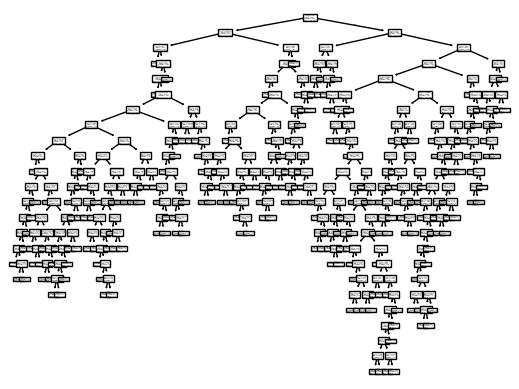

In [213]:
# Evaluación de resultados
tree = DecisionTreeClassifier()
arbol = tree.fit(X_train, y_train)
plot_tree(arbol)

In [223]:
# Predecir sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [233]:
predicciones = tree_model.predict(X_test)

In [237]:
predicciones

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1], dtype=int64)

In [225]:
# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       157
           1       0.59      0.49      0.53       111

    accuracy                           0.65       268
   macro avg       0.64      0.63      0.63       268
weighted avg       0.64      0.65      0.64       268



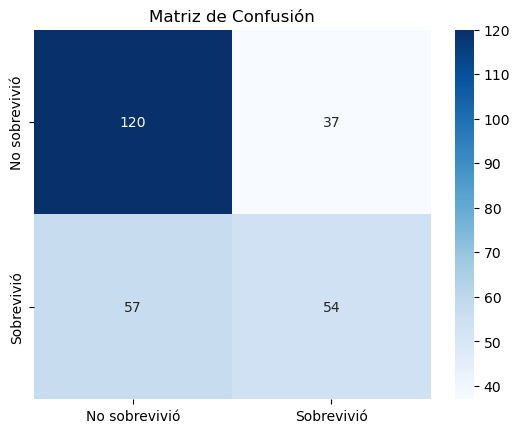

In [194]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.show()